<a href="https://colab.research.google.com/github/arthur-siqueira/AlgebraLinear/blob/main/projetoalgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Função para carregar imagem e converter para tons de cinza

def load_image_grayscale(path):
  img = Image.open(path).convert('L')
  return np.array(img, dtype=float)


In [ ]:
# Função para compressão SVD
def compress_svd(image_matrix, k):
    U, S, VT = np.linalg.svd(image_matrix, full_matrices=False)
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]
    compressed = np.dot(U_k, np.dot(S_k, VT_k))
    return compressed

In [ ]:
# caminho da imagem

image_path = "penguin.png"

In [ ]:
# carregar imagem

original_img = load_image_grayscale(image_path)

In [ ]:
# Escolha do número de valores singulares

k = 1

In [ ]:
# Reconstruir imagem

compressed_img = compress_svd(original_img, k)

In [ ]:
# Garantir que valores fiquem no intervalo [0,255]

compressed_img_clipped1 = np.clip(compressed_img, 0, 255)

In [ ]:
# converter para uint8 e salvar

compressed_img_uint8 = compressed_img_clipped1.astype(np.uint8)

compressed_image_pil1 = Image.fromarray(compressed_img_uint8)


In [ ]:
# salvar no disco

output_filename = f"imagem_comprimida_k{k}.png"

compressed_image_pil1.save(output_filename)
print(f"Imagem comprimida salva")

Imagem comprimida salva


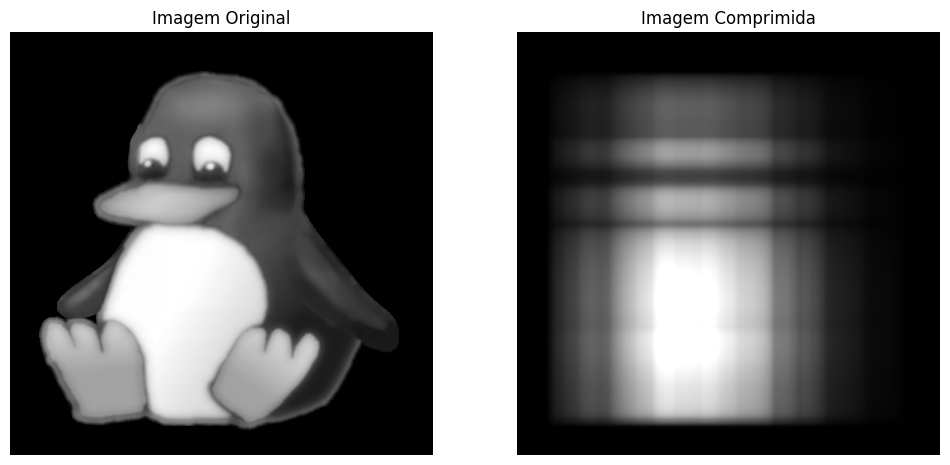

In [ ]:
# Exibir a imagem original e a comprimida lado a lado
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(original_img, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(compressed_img_uint8, cmap='gray')
plt.title(f"Imagem Comprimida")
plt.axis('off')




plt.show()

In [ ]:
U, S, Vt = np.linalg.svd(original_img, full_matrices=False)

In [ ]:
erros = []
ks = range(1, len(S) + 1)

for k in ks:
    Ak = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    erro = np.linalg.norm(original_img - Ak, ord='fro')
    erros.append(erro)

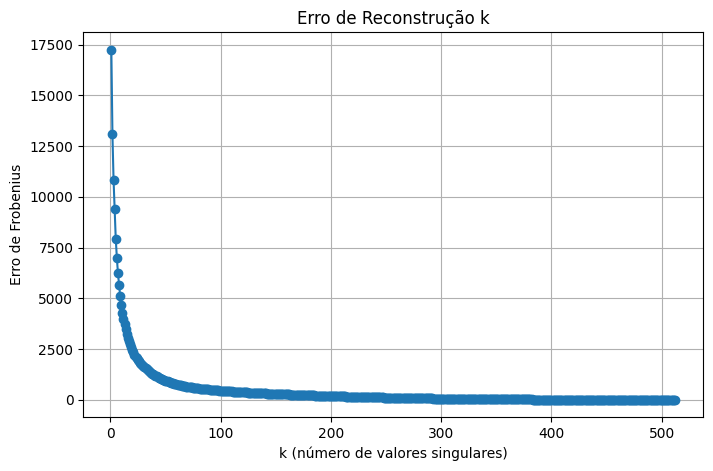

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(ks, erros, marker='o')
plt.xlabel('k (número de valores singulares)')
plt.ylabel('Erro de Frobenius')
plt.title('Erro de Reconstrução k')
plt.grid(True)
plt.show()